Data Preprocessing: with the focus on missing value imputation
Feature Engineering and EDA: univariate analysis and multivariate analysis; handling outliers and feature transformation
Model Building: split dataset and fit the data logistic regression
Model Evaluation: confusion matrix, accuracy, ROC, and AUC
However, it is just a basic guide which is aiming to let you have a grasp of implementing logistic regression hopefully in a timely manner. There is ample space to improve the current model, by introducing hyperparameter tuning, feature importance, and standardization. As always, let’s keep learning.

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
from pandas.api.types import is_string_dtype 
from pandas.api.types import is_numeric_dtype 
import matplotlib.pyplot as plt 

In [79]:
df = pd.read_csv("D:\\Sourav DS\\Kaggle Begginer\\weatherAUS.csv\\weatherAUS.csv")
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [80]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


In [81]:
missing_value = df.isnull().sum()
value_count = df.isnull().count()
missing_percentage = round(missing_value/value_count *100,1)
missing_df = pd.DataFrame({'count':missing_value,'percentage': missing_percentage})
print(missing_df)

               count  percentage
Date               0         0.0
Location           0         0.0
MinTemp         1485         1.0
MaxTemp         1261         0.9
Rainfall        3261         2.2
Evaporation    62790        43.2
Sunshine       69835        48.0
WindGustDir    10326         7.1
WindGustSpeed  10263         7.1
WindDir9am     10566         7.3
WindDir3pm      4228         2.9
WindSpeed9am    1767         1.2
WindSpeed3pm    3062         2.1
Humidity9am     2654         1.8
Humidity3pm     4507         3.1
Pressure9am    15065        10.4
Pressure3pm    15028        10.3
Cloud9am       55888        38.4
Cloud3pm       59358        40.8
Temp9am         1767         1.2
Temp3pm         3609         2.5
RainToday       3261         2.2
RainTomorrow    3267         2.2


There are four fields with 38% to 48% of missing data. I dropped these columns since most probably these values are missing not at random. For example, we are missing a large number of evaporation figures and this may be limited by the capacity of the measuring instruments. Consequently, days with more extreme evaporation measures may not be recorded in the first place. Therefore, the remaining numbers are already biased. To that end, retaining these fields may contaminate the input data. If you would like to distinguish three common types of missing data, you may find this article “How to Address Missing Data” helpful.

In [82]:
## drop  the variable which have the highest number of % missing values inthe data frame

df = df.drop(['Evaporation','Sunshine','Cloud9am','Cloud3pm'],axis = 1)
####### drop row with missing labels 

df = df.dropna(subset= ['RainTomorrow'])

For the remaining columns, imputed the categorical variables and numerical variables separately. The code below classified columns into a categorical list and a numerical list, which would be also helpful in the later EDA process.

In [83]:
#find out the columns are nnumeric or Ctaegorical 

num_list = []
cat_list = []

for column in df : 
    if column != 'RainTomorrow' :
        if is_numeric_dtype(df[column]):
            num_list.append(column)
        elif is_string_dtype(df[column]):
            cat_list.append(column)


            
print(num_list)
print(cat_list)


['MinTemp', 'MaxTemp', 'Rainfall', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Temp9am', 'Temp3pm']
['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday']


Numerical Variables: impute missing values with the mean of the variable. Notice that combining df.fillna()and df.mean() would be enough to transform only numerical variables.

In [84]:
## Missing value imputation for Numerical values 

df.fillna(df.mean(),inplace = True)
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,No,No


In [85]:
#### Missing value imputation for Categorical variable 
#Categorical Variables: iterate through the cat_list and replace missing values with “Unknown”

for i in (cat_list):
    if df[i].isnull().any():
        df[i].fillna("Unknown",inplace = True)
        
    


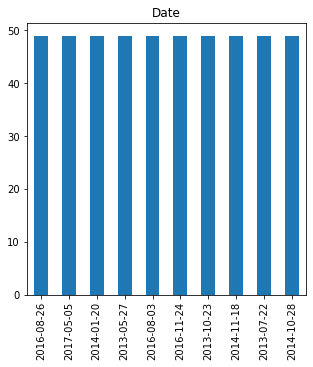

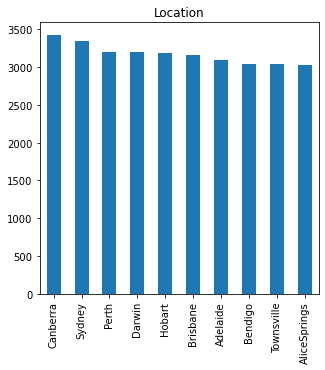

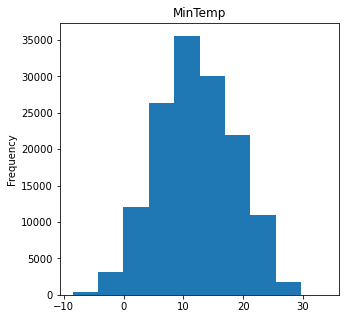

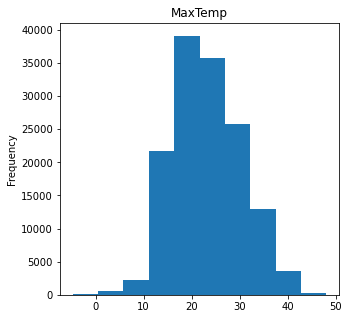

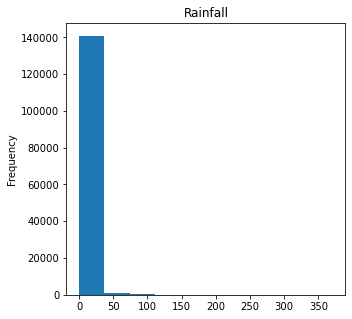

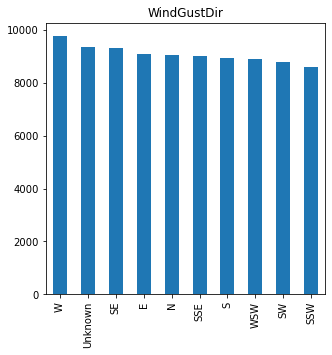

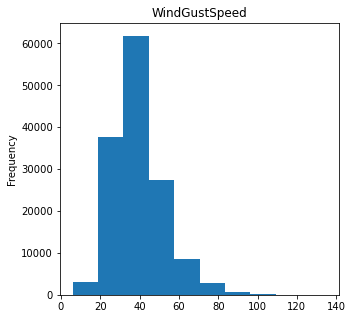

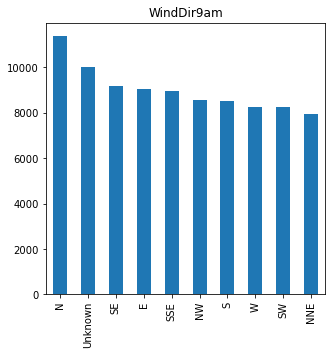

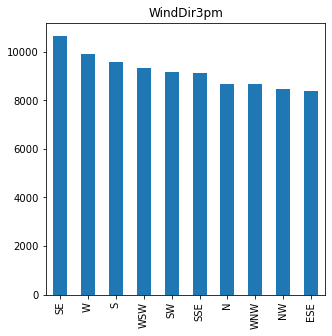

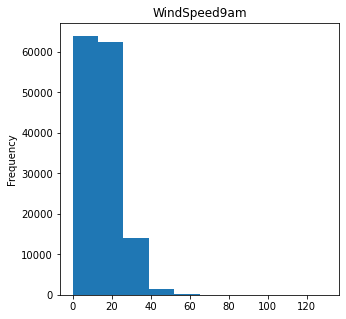

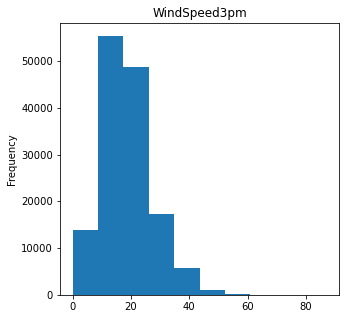

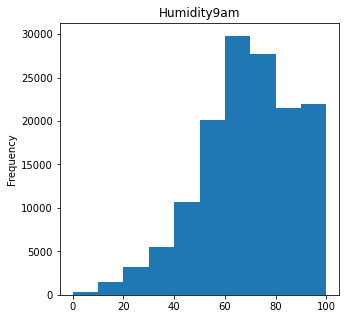

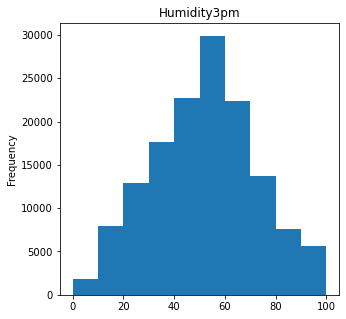

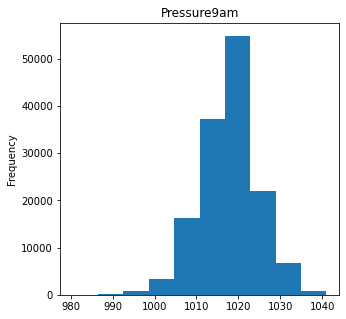

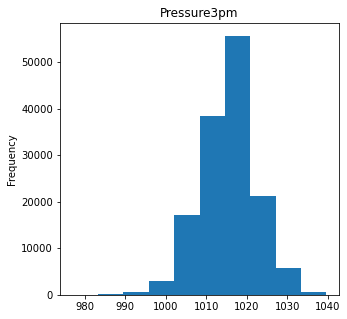

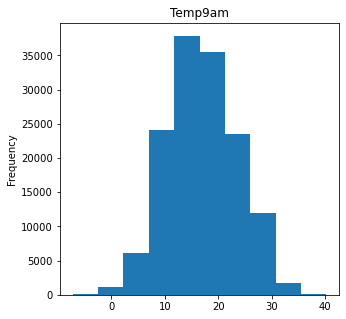

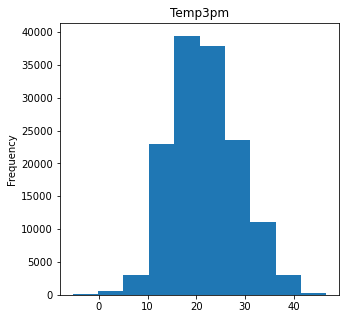

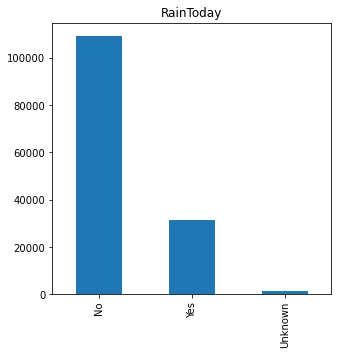

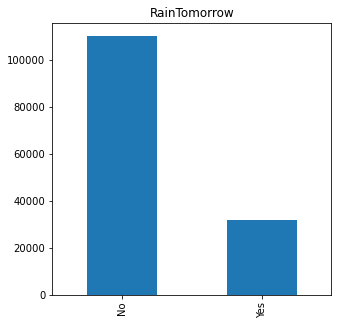

In [86]:
################# Creating thr plots for the NUmeric is Histogram and category variables are Bar graph 

for column in df:
    plt.figure(column,figsize = (5,5))
    plt.title(column)
    if is_numeric_dtype(df[column]):
        df[column].plot(kind = 'hist')
    elif is_string_dtype(df[column]):
        df[column].value_counts()[:10].plot(kind = 'bar')
        

<AxesSubplot:ylabel='Frequency'>

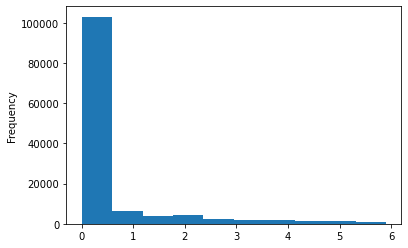

In [87]:
###### sddress the putlier in rainfall 

maximum = df['Rainfall'].quantile(0.9)
df = df[df['Rainfall']< maximum]
df['Rainfall'].plot(kind = 'hist')


2.Feature Transformation
Date variable was transformed into Month. This is because Date has such high cardinality which makes it impossible to bring out patterns. Whereas using month may give suggestions whether it is more likely to rain in certain months of the year.

<AxesSubplot:>

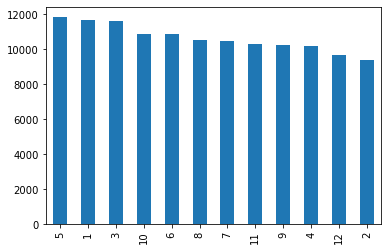

In [88]:
df['month'] = pd.to_datetime(df['Date']).dt.month.apply(str)
df['month'].value_counts().plot(kind = 'bar')

Categorical Feature Encoding

Logistic regression only accepts numeric values as the input, therefore, it is necessary to encode the categorical data into numbers. The most common techniques are one-hot encoding and label encoding. I found this article brings an excellent comparison between these two.

In [90]:
import sklearn
from sklearn.preprocessing import LabelEncoder 

cat_fea = ['Location','WindGustDir','WindDir9am','WindDir3pm','RainToday','month','RainTomorrow']
le = sklearn.preprocessing.LabelEncoder()
for i in cat_fea :
    df[i] = le.fit_transform(df[i].astype(str)) #Encoders require their input to be uniformly strings or numbers

df.head()


,Date,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,month
0,2008-12-01,12,13.4,22.9,0.6,6,44.0,6,7,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,0,0,3
1,2008-12-02,12,7.4,25.1,0.0,7,44.0,13,8,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,0,0,3
2,2008-12-03,12,12.9,25.7,0.0,8,46.0,6,8,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,0,0,3
3,2008-12-04,12,9.2,28.0,0.0,11,24.0,16,0,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,0,0,3
4,2008-12-05,12,17.5,32.3,1.0,6,41.0,1,14,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,0,0,3


In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 25 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  int32  
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    145460 non-null  int32  
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

4) Feature Selection

Correlation matrix is a common multivariate EDA method that assists in identifying highly correlated variables.

<AxesSubplot:>

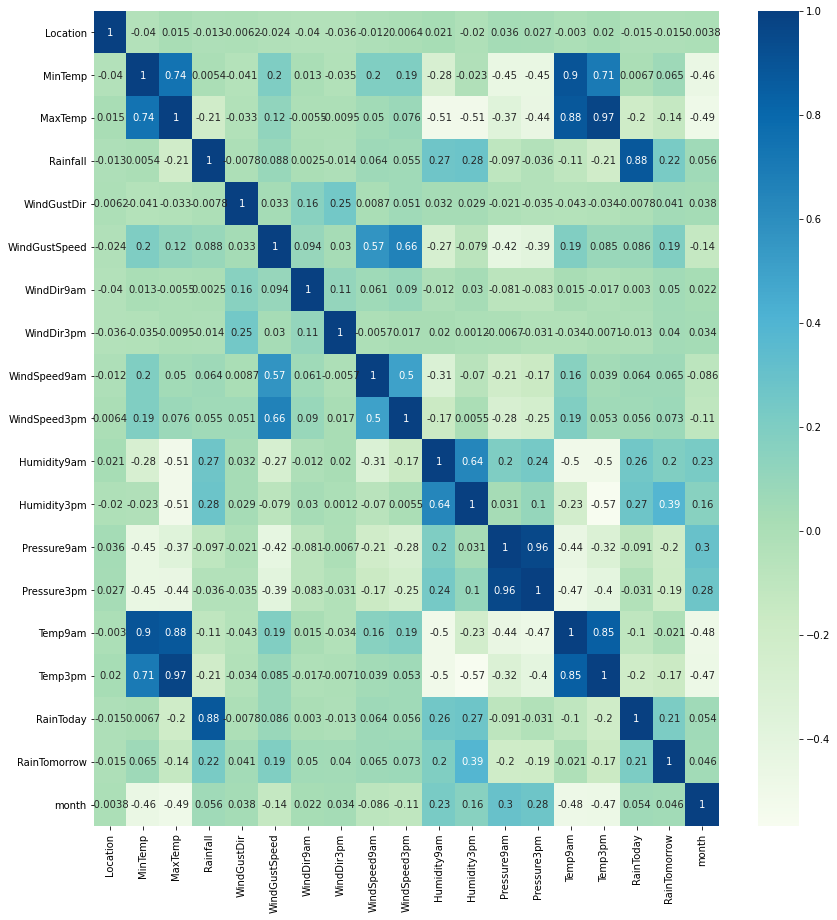

In [91]:
plt.figure(1,figsize = (14,15))
correlation = df.corr()
sns.heatmap(correlation,cmap = 'GnBu',annot = True)


Since logistic regression requires there to be little multicollinearity among predictors, 
I tried to keep only one variable in each group of highly correlated variables.

In [93]:
df_1 = df[['month','Location','MinTemp','MaxTemp','WindGustDir','WindSpeed9am','WindSpeed3pm','Humidity9am'
,'Humidity3pm','Pressure3pm','RainToday','RainTomorrow']]



3. Model Building

Where We have to predict that the probability of having rain tomorrow 

Therefore, the first task is to separate the input features (independent variables — X) and the label (dependent variable — y).

In [112]:
x = df.iloc[:,1:-1]
x

#y = df['RainTomorrow']
#y

,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,12,13.4,22.9,0.6,6,44.0,6,7,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,0,0
1,12,7.4,25.1,0.0,7,44.0,13,8,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,0,0
2,12,12.9,25.7,0.0,8,46.0,6,8,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,0,0
3,12,9.2,28.0,0.0,11,24.0,16,0,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,0,0
4,12,17.5,32.3,1.0,6,41.0,1,14,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145454,36,3.5,21.8,0.0,0,31.0,9,0,15.0,13.0,59.0,27.0,1024.7,1021.2,9.4,20.9,0,0
145455,36,2.8,23.4,0.0,0,31.0,16,1,13.0,11.0,51.0,24.0,1024.6,1020.3,10.1,22.4,0,0
145456,36,3.6,25.3,0.0,13,22.0,16,10,13.0,9.0,56.0,21.0,1023.5,1019.1,10.9,24.5,0,0
145457,36,5.4,26.9,0.0,10,37.0,16,7,9.0,9.0,53.0,24.0,1021.0,1016.8,12.5,26.1,0,0


Secondly, both features and labels are broken down into a subset for training and another for testing. As the result, four portions are returned, X_train, X_test, y_train, and y_test. To achieve this, we introduce the train_test_split function and specify the parameter test_size. In the example below, test_size = 0.33, hence roughly 2/3 data used for training and 1/3 used for testing.


In [155]:
from sklearn.model_selection import train_test_split 

x_train ,x_test ,y_train,y_test = train_test_split(x,y,test_size = 0.40,random_state = 42)
print(x_train ,x_test ,y_train,y_test.shape)

        Location  MinTemp  MaxTemp  Rainfall  WindGustDir  WindGustSpeed  \
99010          0     16.2     34.8       0.0            8      24.000000   
12962         14      2.8     19.0       0.0            0      33.000000   
61111         45      9.6     22.3       0.0           12      26.000000   
77324         27      3.4     11.5       0.2            4      20.000000   
91866          6     13.6     25.9       0.0           13      41.000000   
...          ...      ...      ...       ...          ...            ...   
136561        23     19.0     33.7       0.0            8      50.000000   
118362        26     21.7     38.0       0.0            3      44.000000   
966           12      2.4     17.5       0.0            1      17.000000   
18006         17     18.0     24.6       4.2            5      39.984292   
138725        23      6.0     24.7       0.0            7      24.000000   

        WindDir9am  WindDir3pm  WindSpeed9am  WindSpeed3pm  Humidity9am  \
99010       

Thanks to scikit-learn, we can avoid the tedious process of implementing all the math and algorithms from scratch. Instead, all we need to do is to import LogisticRegression from the sklearn library and fit the training data into the model. However, there is still the flexibility of changing the model by specifying several parameters, e.g. max_iter, solver, penalty. More complicated machine learning models would usually involve hyperparameter tuning process that searches through the possible hyperparameter values and finds the optimal combinations.
For this beginner-friendly model, I only alter the max_iter parameter to let the logistic regression converge, but at the same time, the number should not be too high to cause overfitting.

In [156]:
from sklearn.linear_model import LogisticRegression 

reg = LogisticRegression(max_iter=40)
reg.fit(x_train,y_train)
y_pred = reg.predict(x_test)



C:\Users\saapa\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


4. Model Evaluation

a. Confusion Matrics 
b. Accuracy Score 
c. Precission 
d. Recall 
e .F1 Score 
d. AUC -ROC Curve 

Accuracy: 0.8553794992175274


'              precision    recall  f1-score   support\n\n           0       0.88      0.96      0.92     41610\n           1       0.68      0.41      0.51      9510\n\n    accuracy                           0.86     51120\n   macro avg       0.78      0.68      0.71     51120\nweighted avg       0.84      0.86      0.84     51120\n'

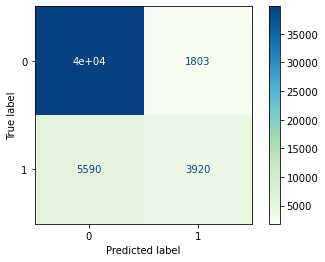

In [157]:
from sklearn import metrics 
## Confusion Matrix 

confusion_mat = metrics.plot_confusion_matrix(reg,x_test,y_test,cmap = 'GnBu')
print(confusion_mat)
print('Accuracy:',metrics.accuracy_score(y_test,y_pred))

metrics.classification_report(y_test,y_pred)


In [159]:
####   ROC AND AUC Curve 

y_pred_prob = reg.predict_proba(x_test)
y_pred_prob = y_pred_prob[:,1]

fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_prob)
roc_auc = metrics.auc(fpr, tpr)

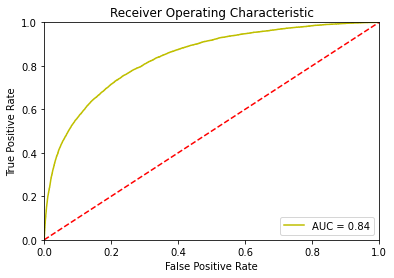

In [160]:
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'y', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [161]:
metrics.precision_score(y_test, y_pred)
metrics.recall_score(y_test,y_pred)
metrics.f1_score(y_test,y_pred)

0.5146720934812578

In [175]:
 
lower=int(input("Enter the lower range:"))
upper=int(input("Enter the upper range:"))
for i in range (lower,upper+1):
    if(i%7==0 and i%5==0):
        print(i)
        

Enter the lower range:100
Enter the upper range:200
105
140
175


In [192]:
first_name = input('Enter the First Name:')
last_name  = input('Enter the last Name :')

fullname = first_name + " " +last_name

first_name[::-1] +" "+ last_name[::-1]

Enter the First Name:Aahnik 
Enter the last Name :Pal


' kinhaA laP'

In [188]:
r = 12^3
p = 3.14 

v = 4/3* p* r
v

62.8

In [5]:
titanic = pd.read_csv('D:\\Sourav DS\\Kaggle Begginer\\titanic\\test.csv')
titanic.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [9]:
titanic.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [8]:
titanic.fillna(0,inplace = True)
titanic.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,0,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,0,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,0,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,0,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,0,S


In [10]:
titanic.Pclass.unique()

array([3, 2, 1], dtype=int64)

In [11]:
import seaborn as sns 

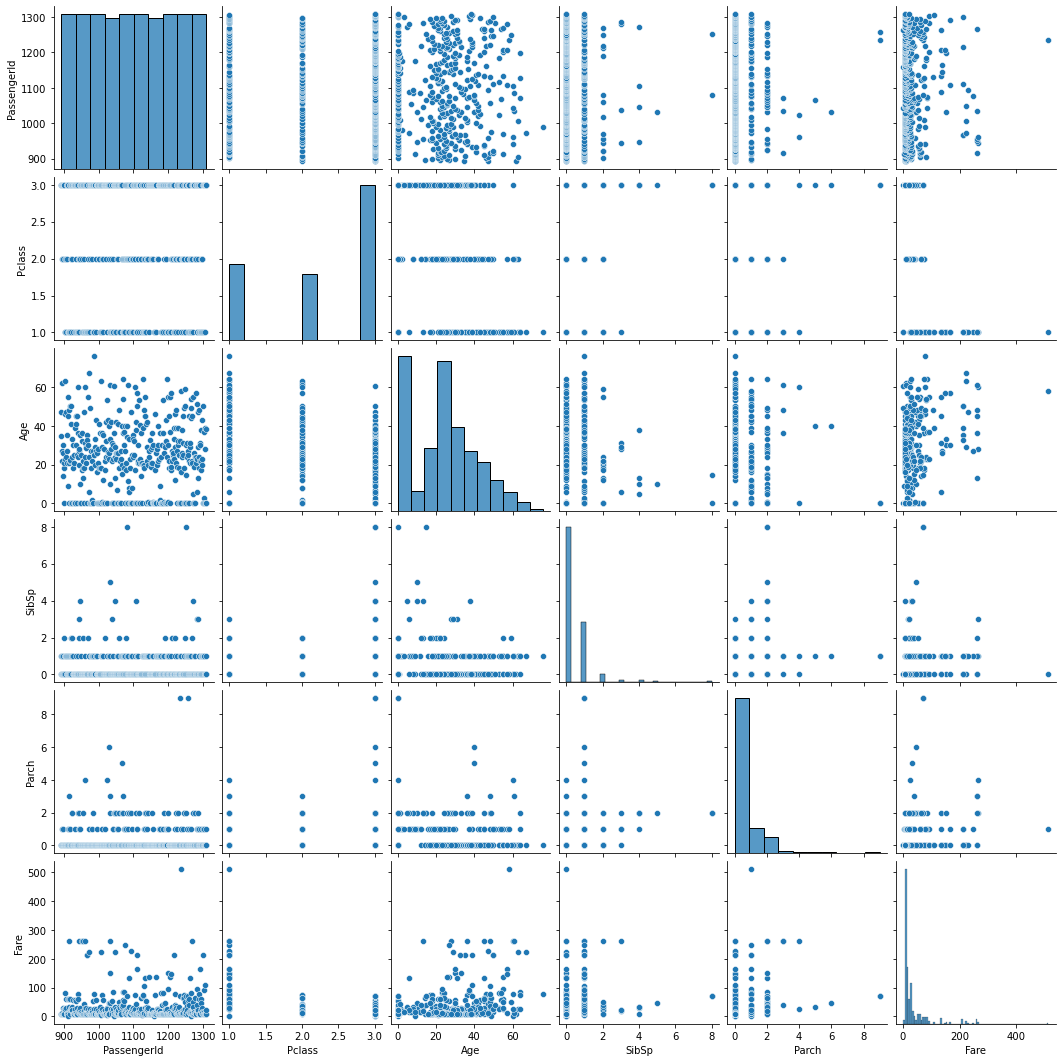

In [15]:
sns.pairplot(titanic,dropna=True,corner = False)

In [13]:
titanic.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000
mean,1100.500000,2.265550,24.044258,0.447368,0.392344,35.541956
std,120.810458,0.841838,17.599608,0.896760,0.981429,55.867684
min,892.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,9.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,24.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,35.750000,1.000000,0.000000,31.471875
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [16]:
2504+150

2654